## Multi Atom Solutes

In [1]:
import MDAnalysis as mda
from solvation_analysis.solute import Solute

from solvation_analysis.tests.datafiles import iba_data, iba_dcd
# %load_ext autoreload

In [3]:
u = mda.Universe(iba_data, iba_dcd)

iba = u.select_atoms("byres element C")
H2O = u.atoms - iba

In [4]:
solute = Solute.from_atoms(iba, {'IBA': iba, 'H2O': H2O}, solute_name='iba')

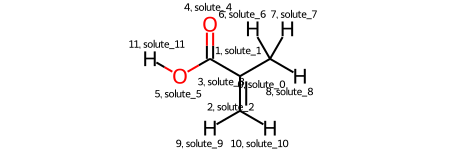

In [5]:
solute.draw_molecule('iba')

In [6]:
rename_solutes = dict(solute_4='ketone_O', solute_5='alcohol_O', solute_11='alcohol_H')


solute = Solute.from_atoms(
    iba,
    {'IBA': iba, 'H2O': H2O},
    solute_name='iba',
    rename_solutes=rename_solutes,
)

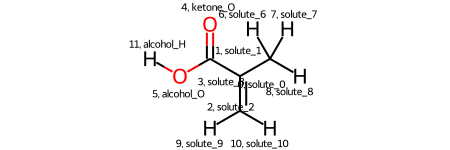

In [7]:
solute.draw_molecule('iba')

In [9]:
solute_list = [solute.atom_solutes[name] for name in ['ketone_O', 'alcohol_O', 'alcohol_H']]

solute = solute.from_solute_list(
    solute_list,
    {'IBA': iba, 'H2O': H2O},
    analysis_classes='all',
    networking_solvents='IBA',
)

In [10]:
solute.run()

/Users/orioncohen/miniconda3/envs/solvation_analysis/lib/python3.8/site-packages/pandas/core/apply.py:131: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  return func(x, *args, **kwargs)
/Users/orioncohen/projects/development/solvation-analysis/solvation-analysis/solvation_analysis/residence.py:148: UserWarning: the autocovariance for H2O does not converge to zero so a residence time cannot be calculated. A longer simulation is required to get a valid estimate of the residence time.
  warnings.warn(f'the autocovariance for {res_name} does not converge to zero '
/Users/orioncohen/projects/development/solvation-analysis/solvation-analysis/solvation_analysis/residence.py:148: UserWarning: the autocovariance for IBA does not converge to zero so a residence time cannot be calculated. A longer simulation is required to get a valid estimate of the residence time.
  warnings.warn(f'the autocovariance for {res_name} does not converge to zero '
/Users/orioncohen/mi

In [13]:
solute.atom_solutes['ketone_O'].coordination.cn_dict

{'H2O': 0.615, 'IBA': 0.3375}

In [14]:
solute.coordination.cn_dict

{'H2O': 1.145, 'IBA': 0.7324999999999999}

In [19]:
solute.networking.network_df.head(100)

solvent solvent_ix
frame network                   
0     0           IBA          1
      0           IBA        100
      0           IBA        237
      0           IBA          1
      0           IBA        100
...               ...        ...
      17          IBA         52
      17          IBA        379
      18          IBA         43
      18          IBA         55
      18          IBA         43

[100 rows x 2 columns]